In [1]:
import numpy as np
import pandas as pd

## Tabla Puertos por cada Planta

Esta tabla describe las rutas permitidas entre los almacenes y los puertos de envío.

In [2]:
puertos_por_planta = pd.read_excel("C:\\Users\\Hernan\\Documents\\Datasets\\Supply Chain\\Logisitcs problem.xlsx", sheet_name = "PlantPorts").iloc[:, :2]

puertos_por_planta.columns = ["Planta", "Puerto de origen"]

In [3]:
puertos_por_planta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Planta            22 non-null     object
 1   Puerto de origen  22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


*¿La tabla contiene filas duplicadas?*

In [4]:
puertos_por_planta.duplicated().any()

False

In [5]:
values = np.arange(1, 16, 1)

puertos_por_planta[["Planta", "Puerto de origen"]] = puertos_por_planta[["Planta", "Puerto de origen"]].replace({"[^\d.]": ""}, regex = True).astype(int)
puertos_por_planta = puertos_por_planta.loc[puertos_por_planta["Planta"].isin(values), :]

puertos_por_planta

,Planta,Puerto de origen
0,1,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,6
7,7,1
8,7,2
9,8,4


In [6]:
puertos_agrup_por_planta = puertos_por_planta.groupby(by = "Planta").agg({"Planta": "size"}).rename(columns = {"Planta": "Recuento de Puertos de origen"})

puertos_agrup_por_planta

,Recuento de Puertos de origen
Planta,
1,2
2,1
3,1
4,1
5,1
6,1
7,2
8,1
9,1


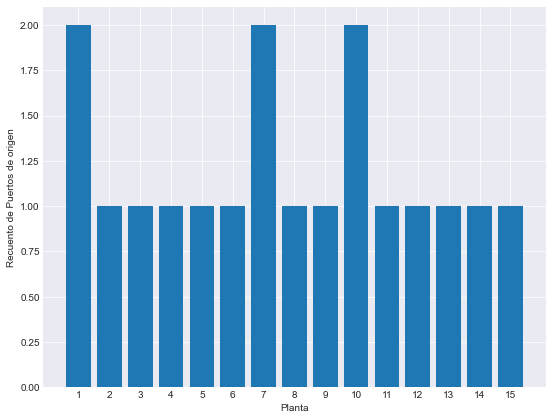

In [7]:
from functions import plot_bar

plot_bar("Planta", "Recuento de Puertos de origen", puertos_agrup_por_planta.index, puertos_agrup_por_planta["Recuento de Puertos de origen"])